In [1]:
import yfinance as yf

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

Price                           Open     Volume  
Ticker                          TSLA       TSLA  
Date                                             
2020-01-02 00:00:00+00:00  28.299999  142981500  
2020-01-03 00:00:00+00:00  29.366667  266677500  
2020-01-06 00:00:00+00:00  29.364668  151995000  
2020-01-07 00:00:00+00:00  30.760000  268231500  
2020-01-08 00:00:00+00:00  31.580000  467164500  


In [2]:
tesla_data.to_csv('tesla_stock_data.csv')


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de ingresos de Tesla en MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Realizar la solicitud HTTP
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Analizar el contenido de la página
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar todas las tablas
tables = soup.find_all('table')

# Verificar si se encontraron tablas
if len(tables) > 1:
    # Tomar la segunda tabla, que usualmente contiene los ingresos
    table = tables[1]

    # Leer la tabla como DataFrame
    tesla_revenue = pd.read_html(str(table))[0]

    # Limpiar y preparar los datos
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    tesla_revenue = tesla_revenue.dropna()

    print(tesla_revenue.tail())  # Mostrar últimas 5 filas
else:
    print("No se encontraron suficientes tablas en la página para extraer los ingresos.")



         Date  Revenue
56 2010-09-30     31.0
57 2010-06-30     28.0
58 2010-03-31     21.0
60 2009-09-30     46.0
61 2009-06-30     27.0


<ipython-input-9-daf31669e6f4>:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [10]:
gme_data = yf.download('GME', start='2010-01-01', end='2023-12-31')

# Restablecer índice y mostrar las primeras 5 filas
gme_data.reset_index(inplace=True)
print(gme_data.head())

# Guardar en archivo CSV
gme_data.to_csv('gamestop_stock_data.csv', index=False)


[*********************100%***********************]  1 of 1 completed

Price                       Date Adj Close   Close    High     Low    Open  \
Ticker                                 GME     GME     GME     GME     GME   
0      2010-01-04 00:00:00+00:00  3.854642  5.7250  5.7375  5.5000  5.5175   
1      2010-01-05 00:00:00+00:00  3.959006  5.8800  5.9350  5.7250  5.7275   
2      2010-01-06 00:00:00+00:00  4.044850  6.0075  6.0250  5.8050  5.8650   
3      2010-01-07 00:00:00+00:00  3.443930  5.1150  5.2925  4.8550  5.0025   
4      2010-01-08 00:00:00+00:00  3.415315  5.0725  5.3075  5.0575  5.1600   

Price      Volume  
Ticker        GME  
0        26702800  
1        21269600  
2        21471200  
3       164761200  
4        47872400  


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de ingresos de GameStop en MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Realizar la solicitud HTTP
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Analizar el contenido de la página
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar todas las tablas
tables = soup.find_all('table')

# Verificar si hay suficientes tablas
if len(tables) > 1:
    # Tomar la segunda tabla
    revenue_table = pd.read_html(str(tables[1]))[0]

    # Limpiar y preparar los datos
    revenue_table.columns = ['Date', 'Revenue']
    revenue_table['Revenue'] = revenue_table['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
    revenue_table['Date'] = pd.to_datetime(revenue_table['Date'])
    revenue_table = revenue_table.dropna()

    print(revenue_table.tail())  # Mostrar las últimas 5 filas
else:
    print("No se encontraron suficientes tablas en la página para extraer los datos.")



         Date  Revenue
58 2010-01-31   3524.0
59 2009-10-31   1835.0
60 2009-07-31   1739.0
61 2009-04-30   1981.0
62 2009-01-31   3492.0


<ipython-input-12-b8e0f4e07814>:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  revenue_table = pd.read_html(str(tables[1]))[0]


In [15]:
print(tesla_data.head())
print(tesla_data.info())




Price                          Close                  High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

Price                           Open     Volume  
Ticker                          TSLA       TSLA  
Date                                             
2020-01-02 00:00:00+00:00  28.299999  142981500  
2020-01-03 00:00:00+00:00  29.366667  266677500  
2020-01-06 00:00:00+00:00  29.364668  151995000  
2020-01-07 00:00:00+00:00  30.760000  268231500  
2020-01-08 00:00:00+00:00  31.580000  467164500  
<class 'pandas.

In [19]:
print(tesla_data.columns)  # Verificar los nombres de las columnas
print(tesla_data.head())   # Inspeccionar las primeras filas del DataFrame



MultiIndex([( 'Close', 'TSLA'),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Price                          Close                  High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

Price                           Open     Volume  
Ticker                          TSLA       TSLA  
Date                                             
2020-01-02 00:00:00+00:00  28.2999

In [20]:
tesla_data.rename(columns={'<nombre_actual_de_la_columna>': 'Date'}, inplace=True)


In [21]:
import yfinance as yf

# Descargar datos de Tesla
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)  # Restablecer el índice para que 'Date' sea una columna
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price                       Date Adj Close     Close      High       Low  \
Ticker                                TSLA      TSLA      TSLA      TSLA   
0      2010-06-29 00:00:00+00:00  1.592667  1.592667  1.666667  1.169333   
1      2010-06-30 00:00:00+00:00  1.588667  1.588667  2.028000  1.553333   
2      2010-07-01 00:00:00+00:00  1.464000  1.464000  1.728000  1.351333   
3      2010-07-02 00:00:00+00:00  1.280000  1.280000  1.540000  1.247333   
4      2010-07-06 00:00:00+00:00  1.074000  1.074000  1.333333  1.055333   

Price       Open     Volume  
Ticker      TSLA       TSLA  
0       1.266667  281494500  
1       1.719333  257806500  
2       1.666667  123282000  
3       1.533333   77097000  
4       1.333333  103003500  


In [23]:
tesla_data.rename(columns={'Adj Close': 'Close'}, inplace=True)


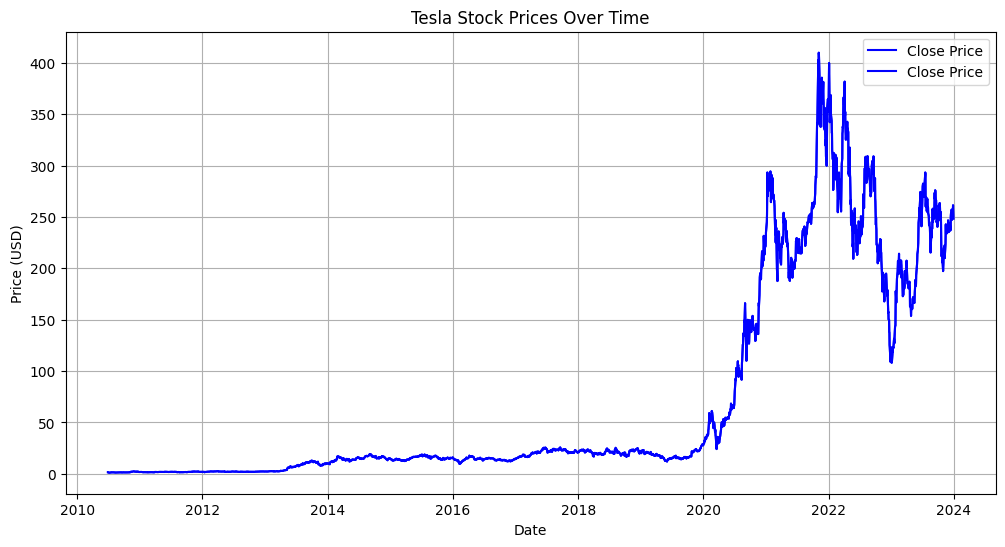

In [24]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Prices Over Time')


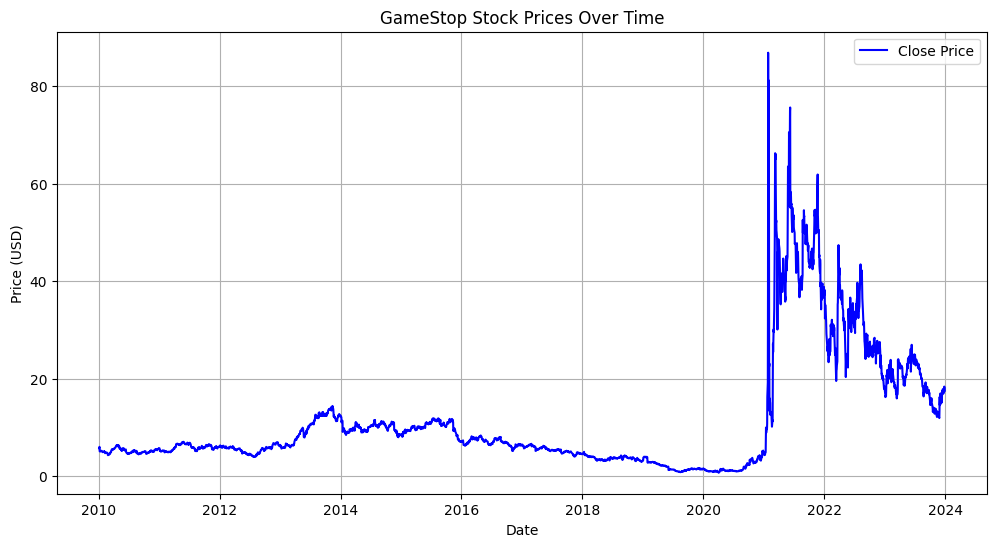

In [25]:
make_graph(gme_data, 'GameStop Stock Prices Over Time')
